In [1]:
from zipfile import ZipFile

In [2]:
chemin_zip=r"C:\Users\dell\Documents\Perso\code.zip"
with ZipFile(chemin_zip, 'r') as zip:
#    zip.printdir()   #les chemins des fichiers contenus dans le fichier zip
    files_names=zip.namelist()  #liste des noms des fichiers
    zip.extractall(r"C:\Users\dell\Documents\Perso\code")   #extraire le zip dans un fichier spécifié
    

In [3]:
print(files_names)

['analyse/', 'analyse/R_analysis.ipynb', 'analyse/python_preprocessing.ipynb', 'analyse/python_analysis.ipynb', 'analyse/R_preprocessing.ipynb', 'analyse/operations_enrichies.csv', 'analyse/python_preprocessing.py', 'analyse/R_preprocessing.r', 'analyse/R_analysis.r', 'analyse/python_analysis.py', 'analyse/operations.csv', 'nettoyage/', 'nettoyage/personnes.csv', 'nettoyage/python_nettoyage.ipynb', 'nettoyage/R_nettoyage.r', 'nettoyage/python_nettoyage.py', 'nettoyage/R_nettoyage.ipynb', 'information.txt']


In [4]:
file_need=[]
for file in files_names:
    if file.endswith('.csv'):
        file_need.append(file)
        
print(file_need)
        

['analyse/operations_enrichies.csv', 'analyse/operations.csv', 'nettoyage/personnes.csv']


In [5]:
file_need[0]

'analyse/operations_enrichies.csv'

In [6]:

chemin=r"C:\Users\dell\Documents\Perso\code" + rf"//{file_need[0]}"

In [7]:
chemin

'C:\\Users\\dell\\Documents\\Perso\\code//analyse/operations_enrichies.csv'

In [8]:
import pandas as pd
df=pd.read_csv(chemin, parse_dates=[1])
df.tail(100)

,date_operation,libelle,montant,solde_avt_ope,categ,type,tranche_depense,sens,annee,mois,jour,jour_sem,jour_sem_num,weekend,quart_mois
208,2023-08-08,CARTE XX XX L'EPICERIE DEMBAS XX XX,-7.54,3708.06,AUTRE,CARTE,petite,debit,2023,8,8,Tuesday,2,False,1
209,2023-08-08,CARTE XX XX XX XX XX XX XX XX,-0.96,3700.52,AUTRE,CARTE,petite,debit,2023,8,8,Tuesday,2,False,1
210,2023-08-08,CARTE XX XX XX XX XX XX XX XX,-1.19,3699.56,AUTRE,CARTE,petite,debit,2023,8,8,Tuesday,2,False,1
211,2023-08-08,CARTE XX XX XX XX XX XX XX XX,-0.96,3698.37,AUTRE,CARTE,petite,debit,2023,8,8,Tuesday,2,False,1
212,2023-08-09,CARTE XX XX XX XX XX,-8.00,3697.41,AUTRE,CARTE,petite,debit,2023,8,9,Wednesday,3,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE,CARTE,petite,debit,2023,10,5,Thursday,4,False,1
304,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE,CARTE,petite,debit,2023,10,5,Thursday,4,False,1
305,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE,AUTRE,petite,debit,2023,10,6,Friday,5,False,1
306,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT,CARTE,petite,debit,2023,10,6,Friday,5,False,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date_operation   308 non-null    object 
 1   libelle          308 non-null    object 
 2   montant          308 non-null    float64
 3   solde_avt_ope    308 non-null    float64
 4   categ            308 non-null    object 
 5   type             308 non-null    object 
 6   tranche_depense  308 non-null    object 
 7   sens             308 non-null    object 
 8   annee            308 non-null    int64  
 9   mois             308 non-null    int64  
 10  jour             308 non-null    int64  
 11  jour_sem         308 non-null    object 
 12  jour_sem_num     308 non-null    int64  
 13  weekend          308 non-null    bool   
 14  quart_mois       308 non-null    int64  
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 34.1+ KB


In [10]:
df.columns

Index(['date_operation', 'libelle', 'montant', 'solde_avt_ope', 'categ',
       'type', 'tranche_depense', 'sens', 'annee', 'mois', 'jour', 'jour_sem',
       'jour_sem_num', 'weekend', 'quart_mois'],
      dtype='object')

In [11]:
from collections import Counter   #pour compter les libellés les plus fréquents

In [12]:
from pprint import pprint
def most_common(labels):
    libelles=[]
    for lab in labels:
        libelles+=lab.split(" ")
    counter=Counter(libelles)
    for word in  counter.most_common(100):
        print(word)
        
most_common(df['libelle'].values)
        

('XX', 1428)
('CARTE', 247)
('VIREMENT', 29)
('LES', 20)
('ANCIENS', 20)
('ROBINSON', 20)
('CHEZ', 16)
('LUC', 16)
("L'EPICERIE", 16)
('DEMBAS', 16)
('LA', 16)
('TOUPTIPRI', 12)
('RETRAIT', 9)
('CCNCF', 9)
('RAPT', 8)
('PRELEVEMENT', 8)
('DON', 7)
('TELEPHONE', 7)
('FORFAIT', 7)
('COMPTE', 7)
('SUPERBANK', 7)
('LOUVE', 7)
('PERMANENT', 6)
('LOYER', 6)
('VELOC', 4)


In [13]:
from pprint import pprint
def categ(state):
    TYPES=dict()
    for cat in state:
        var=cat.split(" ")[0]
        TYPES[var]=var
    del TYPES['XX']
    pprint(TYPES)
categ(df['libelle'].values)

{'CARTE': 'CARTE',
 'DON': 'DON',
 'FORFAIT': 'FORFAIT',
 'PRELEVEMENT': 'PRELEVEMENT',
 'RETRAIT': 'RETRAIT',
 'VIREMENT': 'VIREMENT'}


In [14]:
df

,date_operation,libelle,montant,solde_avt_ope,categ,type,tranche_depense,sens,annee,mois,jour,jour_sem,jour_sem_num,weekend,quart_mois
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,DON,petite,debit,2023,3,31,Friday,5,False,4
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,CARTE,petite,debit,2023,4,3,Monday,1,False,1
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,CARTE,petite,debit,2023,4,3,Monday,1,False,1
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE,VIREMENT,(pas une dépense),credit,2023,4,3,Monday,1,False,1
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE,VIREMENT,(pas une dépense),credit,2023,4,3,Monday,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE,CARTE,petite,debit,2023,10,5,Thursday,4,False,1
304,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE,CARTE,petite,debit,2023,10,5,Thursday,4,False,1
305,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE,AUTRE,petite,debit,2023,10,6,Friday,5,False,1
306,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT,CARTE,petite,debit,2023,10,6,Friday,5,False,1


In [15]:
df.columns

Index(['date_operation', 'libelle', 'montant', 'solde_avt_ope', 'categ',
       'type', 'tranche_depense', 'sens', 'annee', 'mois', 'jour', 'jour_sem',
       'jour_sem_num', 'weekend', 'quart_mois'],
      dtype='object')

# Analyse Univariée

In [16]:
verif=df['categ'].value_counts()
verif
print(verif.index)

Index(['AUTRE', 'COURSES', 'TRANSPORT', 'RESTAURANT', 'COTISATION BANCAIRE',
       'FACTURE TELEPHONE', 'LOYER'],
      dtype='object')


In [17]:
effectifs=df['quart_mois'].value_counts()
modalites=effectifs.index

print(effectifs)
print(modalites)

1    86
2    76
3    75
4    71
Name: quart_mois, dtype: int64
Int64Index([1, 2, 3, 4], dtype='int64')


In [18]:
tab=pd.DataFrame(modalites, columns=['quart_mois'])
tab

,quart_mois
0,1
1,2
2,3
3,4


In [19]:
tab['n']=effectifs.values
tab['f']=tab['n']/len(df)
tab

,quart_mois,n,f
0,1,86,0.279221
1,2,76,0.246753
2,3,75,0.243506
3,4,71,0.230519


In [20]:
tab=tab.sort_values("quart_mois")
tab['F']=tab['f'].cumsum()
tab

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


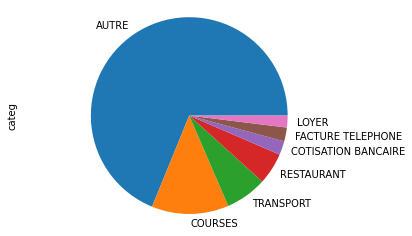

In [21]:
import matplotlib.pyplot as plt
#Variable qualitative
#Diagramme en secteurs
df['categ'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal')
plt.show()

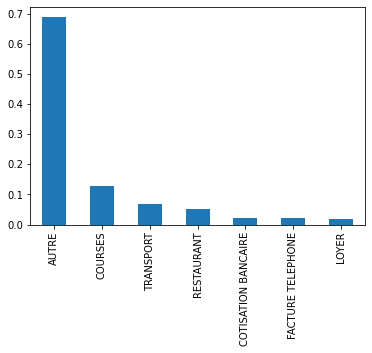

In [22]:
#Diagramme en tuyaux d'orgues
df['categ'].value_counts(normalize=True).plot(kind='bar')
plt.show()

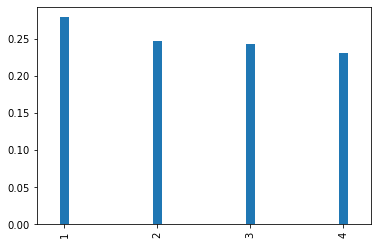

In [23]:
#Variable quantitative
#Diagramme en batons
df['quart_mois'].value_counts(normalize=True).plot(kind='bar', width=0.1)
plt.show()

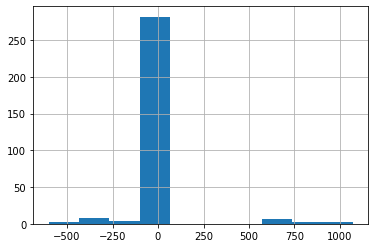

In [24]:
#Histogramme
df['montant'].hist()
plt.show()

In [25]:
#Histogramme plus beau

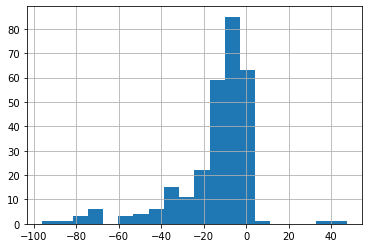

In [26]:
df[df.montant.abs()<100]['montant'].hist(bins=20)
plt.show()

--------------------
AUTRE
moy:
 23.433207547169832
med:
 -8.31
mod:
 0   -1.6
dtype: float64


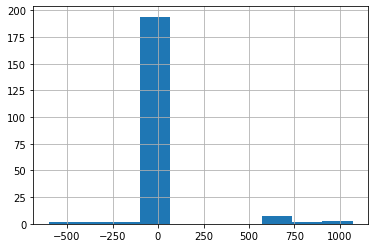

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
dtype: float64


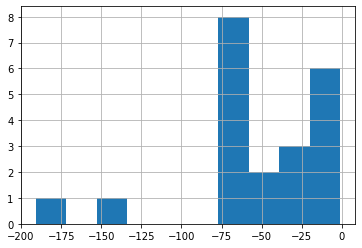

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
dtype: float64


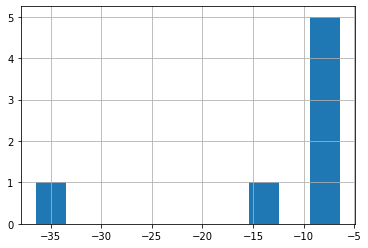

--------------------
COURSES
moy:
 -16.341282051282054
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
dtype: float64


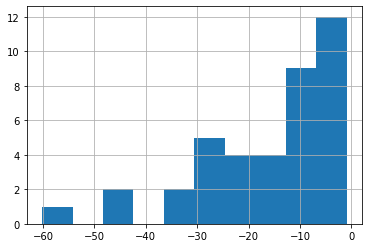

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
dtype: float64


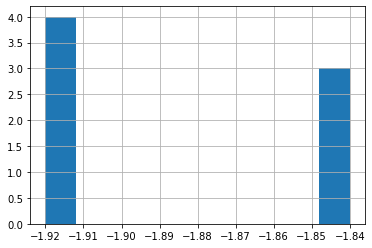

--------------------
RESTAURANT
moy:
 -10.332500000000001
med:
 -10.1
mod:
 0   -9.2
dtype: float64


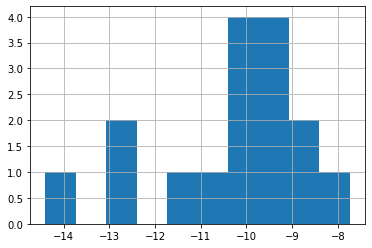

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
dtype: float64


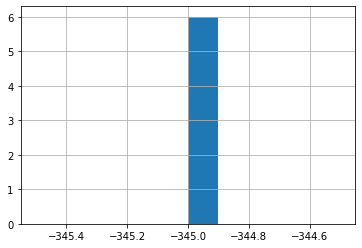

In [27]:
data=df.copy()
for cat in data["categ"].unique():
    subset = data[data.categ == cat] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    subset["montant"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme

--------------------
AUTRE
moy:
 23.433207547169832
med:
 -8.31
mod:
 0   -1.6
dtype: float64
var:
 40401.82999254187
ect:
 201.00206464746046


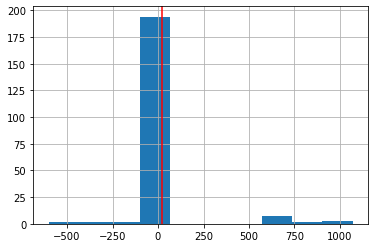

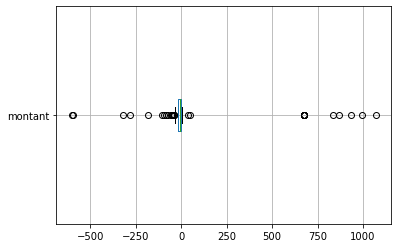

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
dtype: float64
var:
 2205.016868027212
ect:
 46.95760713694014


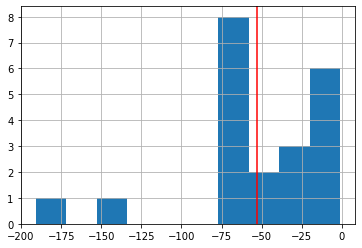

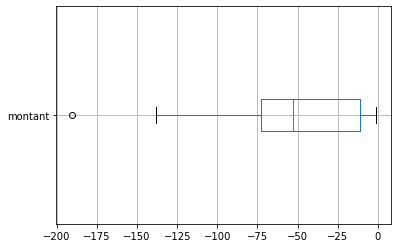

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
dtype: float64
var:
 105.01905306122445
ect:
 10.247880417980317


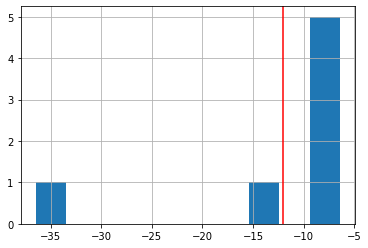

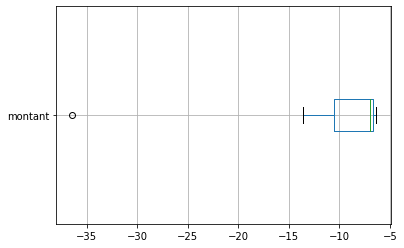

--------------------
COURSES
moy:
 -16.341282051282054
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
dtype: float64
var:
 177.0253547666009
ect:
 13.3050875520081


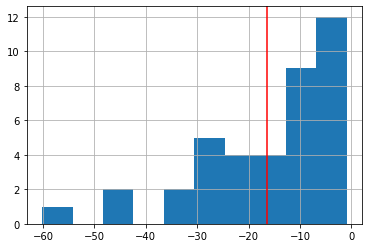

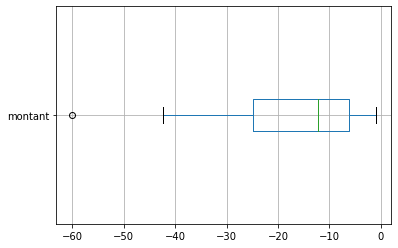

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141


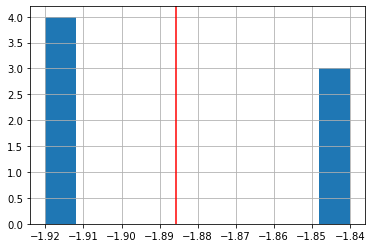

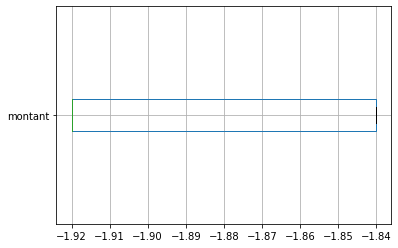

--------------------
RESTAURANT
moy:
 -10.332500000000001
med:
 -10.1
mod:
 0   -9.2
dtype: float64
var:
 2.853193750000001
ect:
 1.689139943876765


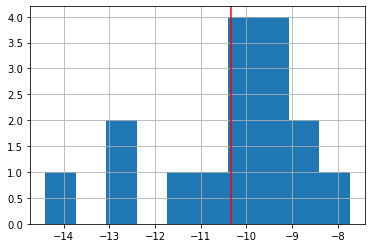

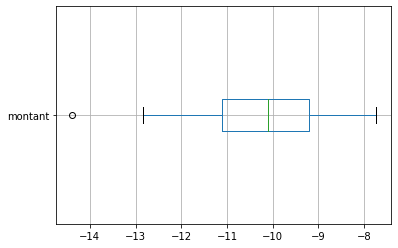

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
dtype: float64
var:
 0.0
ect:
 0.0


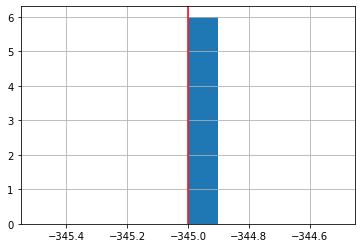

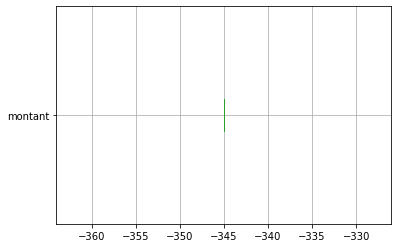

In [28]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=0))
    print("ect:\n",subset['montant'].std(ddof=0))
    subset["montant"].hist()
    plt.axvline(subset['montant'].mean(), color='r')
    plt.show()
    subset.boxplot(column="montant", vert=False)
    plt.show()

--------------------
AUTRE
moy:
 23.433207547169832
med:
 -8.31
mod:
 0   -1.6
dtype: float64
var:
 40401.82999254187
ect:
 201.00206464746046
skw:
 3.1215325222336423
kur:
 12.716537970826295


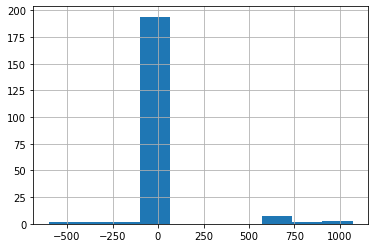

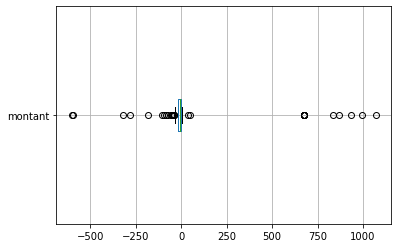

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
dtype: float64
var:
 2205.016868027212
ect:
 46.95760713694014
skw:
 -1.248265076217821
kur:
 2.1922705326917495


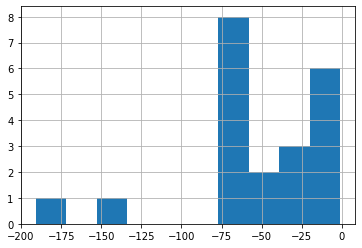

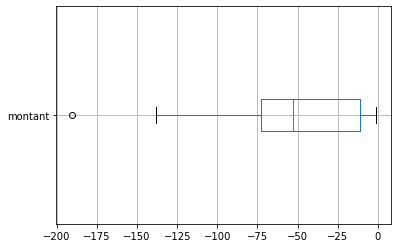

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
dtype: float64
var:
 105.01905306122445
ect:
 10.247880417980317
skw:
 -2.3876514564281526
kur:
 5.798563367885492


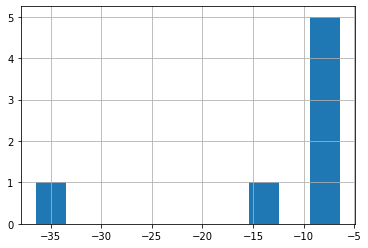

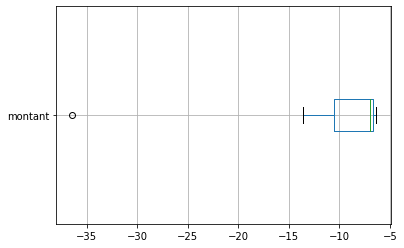

--------------------
COURSES
moy:
 -16.341282051282054
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
dtype: float64
var:
 177.0253547666009
ect:
 13.3050875520081
skw:
 -1.2467488306456977
kur:
 1.604730494087499


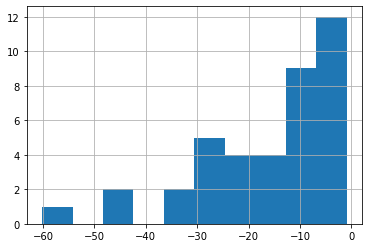

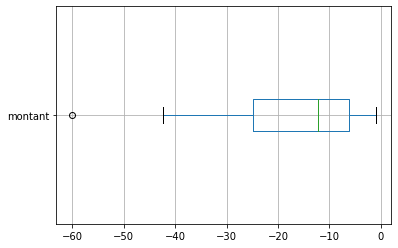

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141
skw:
 0.37416573867739106
kur:
 -2.800000000000003


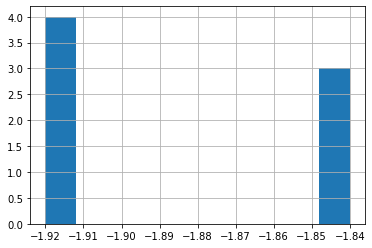

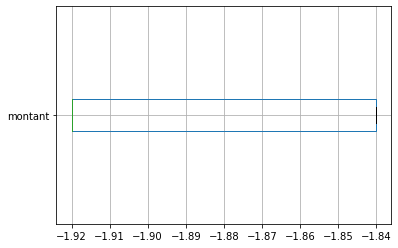

--------------------
RESTAURANT
moy:
 -10.332500000000001
med:
 -10.1
mod:
 0   -9.2
dtype: float64
var:
 2.853193750000001
ect:
 1.689139943876765
skw:
 -0.8883503487158837
kur:
 0.5988855591691937


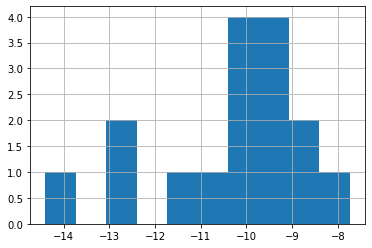

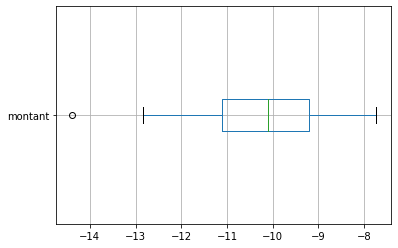

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
dtype: float64
var:
 0.0
ect:
 0.0
skw:
 0
kur:
 0


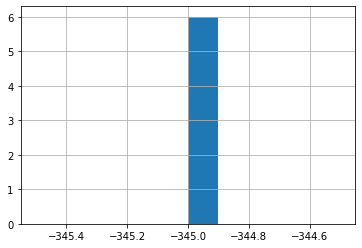

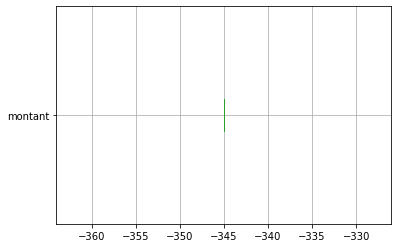

In [29]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=0))
    print("ect:\n",subset['montant'].std(ddof=0))
    print("skw:\n",subset['montant'].skew())
    print("kur:\n",subset['montant'].kurtosis())
    subset["montant"].hist()
    plt.show()
    subset.boxplot(column="montant", vert=False)
    plt.show()

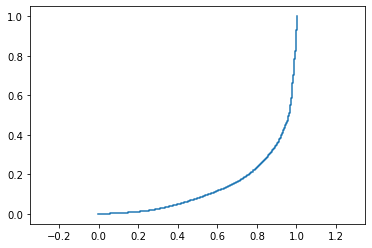

In [30]:
import numpy as np

depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [31]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.7204386813739185

# Analyse Bivariée

# Corrélation entre 2 variables quantitatives

In [ ]:
#exemple: etes-vous moins dépensier lorsque vous avez peu d'argent sur votre compte?
#     --montant~solde_avt_ope

In [32]:
df.columns

Index(['date_operation', 'libelle', 'montant', 'solde_avt_ope', 'categ',
       'type', 'tranche_depense', 'sens', 'annee', 'mois', 'jour', 'jour_sem',
       'jour_sem_num', 'weekend', 'quart_mois'],
      dtype='object')

In [33]:
df.montant

0       -1.44
1      -24.00
2      -73.00
3      676.00
4        4.80
        ...  
303    -10.64
304     -4.80
305     -1.92
306    -10.00
307    -13.58
Name: montant, Length: 308, dtype: float64

In [34]:
df.solde_avt_ope

0      1515.25
1      1513.81
2      1489.81
3      1416.81
4      2092.81
        ...   
303    2440.94
304    2430.30
305    2425.50
306    2423.58
307    2413.58
Name: solde_avt_ope, Length: 308, dtype: float64

Text(0, 0.5, 'montant')

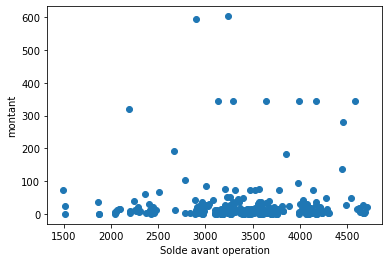

In [75]:
import matplotlib.pyplot as plt
X=depenses['solde_avt_ope']
Y=-depenses['montant']
#plt.plot(X,Y, 'o', alpha=0.5)
plt.scatter(X,Y)
plt.xlabel("Solde avant operation")
plt.ylabel("montant")

In [69]:
#coefficient de corrélation linéaire de pearson et covariance
import scipy.stats as st
import numpy as np

st.pearsonr(depenses["solde_avt_ope"], -depenses["montant"])[0]


0.010068819133759194

In [68]:
np.cov(depenses["solde_avt_ope"], -depenses["montant"], ddof=0)

array([[422791.93532421,    484.95954155],
       [   484.95954155,   5486.90249853]])

In [66]:
np.cov(depenses["solde_avt_ope"], -depenses["montant"], ddof=0)[1][0]

484.95954154532853

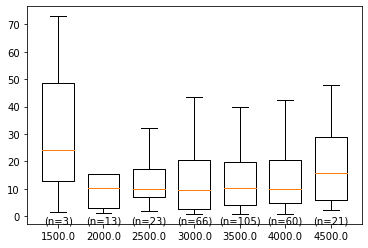

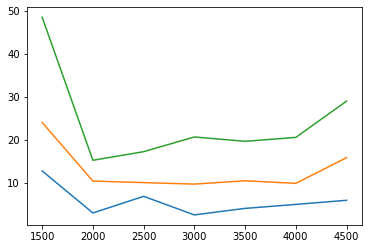

In [79]:
taille_classe = 500 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = -depenses.loc[indices==ind,"montant"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7, # largeur graphique des boxplots
)

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

# affichage des quartiles
for n_quartile in range(3):
    plt.plot([g["centre_classe"] for g in groupes],
             [g["quartiles"][n_quartile] for g in groupes])
plt.show()

In [ ]:
#régression linéaire et calcul erreur RMSE: méthode MCO :Moindres Carrées Ordinaire (OLS)

# Analyse relation entre une variable quantitative et une variable qualitative

In [ ]:
#  montant et weekend
# depenses et catégories


In [81]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 

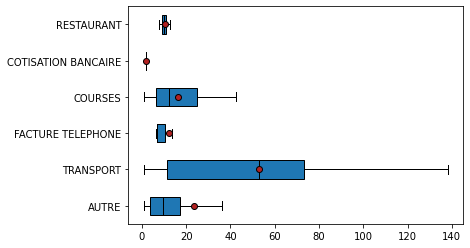

In [82]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [83]:
X = "categ" # qualitative
Y = "montant" # quantitative

sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])    #val trouvée montre 

0.39841890401094926